In [53]:
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import twitter_samples

import pandas as pd

In [54]:
all_positive_tweets=twitter_samples.strings("positive_tweets.json")
all_negative_tweets=twitter_samples.strings("negative_tweets.json")
tweets=all_positive_tweets+all_negative_tweets
labels=np.append(np.ones(len(all_positive_tweets)),(np.zeros(len(all_negative_tweets))))

In [55]:
#split data train and test
pos_train=all_positive_tweets[:4000]
neg_train=all_negative_tweets[:4000]
train=pos_train+neg_train
len(train)

8000

In [56]:
df=pd.read_csv("logistic_features.csv")
df.head(5)

,bias,positive,negative,sentiment
0,1.0,3020.0,61.0,1.0
1,1.0,3573.0,444.0,1.0
2,1.0,3005.0,115.0,1.0
3,1.0,2862.0,4.0,1.0
4,1.0,3119.0,225.0,1.0


In [57]:
Y=df['sentiment'].values
X=df[['bias','positive','negative']].values
print(X.shape)
print(X[:5])

(8000, 3)
[[1.000e+00 3.020e+03 6.100e+01]
 [1.000e+00 3.573e+03 4.440e+02]
 [1.000e+00 3.005e+03 1.150e+02]
 [1.000e+00 2.862e+03 4.000e+00]
 [1.000e+00 3.119e+03 2.250e+02]]


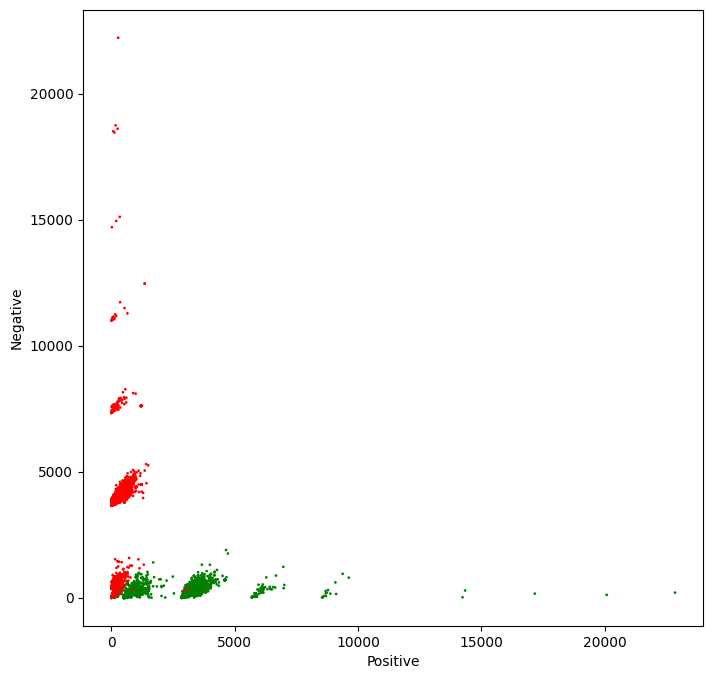

In [58]:
fig,ax=plt.subplots(figsize=(8,8))
colors=['red','green']
plt.xlabel("Positive");plt.ylabel("Negative")
ax.scatter(X[:,1],X[:,2],c=[colors[int(k)] for k in Y], s=0.9)

#### model

$$ z = \theta * x = 0$$
$$ x = [1, pos, neg] $$
$$ z(\theta, x) = \theta_0+ \theta_1 * pos + \theta_2 * neg = 0 $$
$$ neg = (-\theta_0 - \theta_1 * pos) / \theta_2 $$
The red and green lines that point in the direction of the corresponding sentiment are calculated using a perpendicular line to the separation line calculated in the previous equations (neg function). It must point in the same direction as the derivative of the Logit function, but the magnitude may differ. It is only for a visual representation of the model. 
$$direction = pos * \theta_2 / \theta_1$$

In [59]:
def neg(theta,pos):
    return (-theta[0]-pos*theta[1])/theta[2]
def direction(theta,pos):
    return pos*theta[2]/theta[1]

In [60]:
# pre trained model
theta = [6.03518871e-08, 5.38184972e-04, -5.58300168e-04]

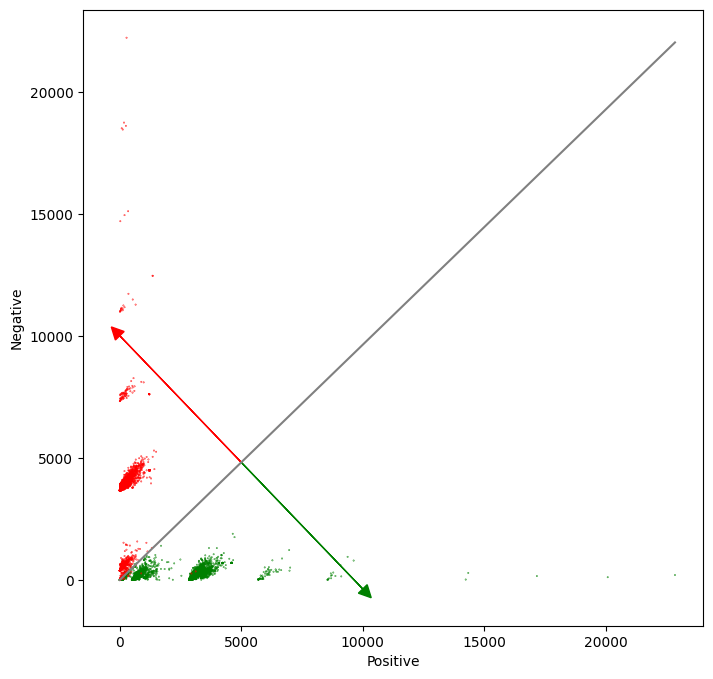

In [65]:
fig, ax = plt.subplots(figsize = (8, 8))
colors = ['red', 'green']
ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s = 0.1) 
plt.xlabel("Positive");plt.ylabel("Negative")

maxpos = np.max(X[:,1])
offset = 5000 # The pos value for the direction vectors origin
ax.plot([0,  maxpos],[neg(theta, 0),neg(theta, maxpos)], color = 'gray') #grey line
ax.arrow(offset, neg(theta, offset), offset, direction(theta, offset), head_width=500, head_length=500, fc='g', ec='g')#green line
ax.arrow(offset, neg(theta, offset), -offset, -direction(theta, offset), head_width=500, head_length=500, fc='r', ec='r')#red line 
plt.show()